In [2]:
from visualize import *
import numpy as np
import pyBigWig
import torch
import os
import sys

In [3]:
def _read_hic_matrix(hic_file, chrom, start, end, res,log1p=True, normalization = 'NONE'):
        """
        Reads a Hi-C interaction matrix for a specified genomic region from a Hi-C file.
        Args:
            hic_file (str): Path to the Hi-C file.
            chrom (str): Chromosome name.
            start (int): Start position of the genomic region.
            end (int): End position of the genomic region.
        Returns:
            csr_matrix: A sparse matrix representing the Hi-C interaction matrix for the specified region.
        The function uses the hicstraw library to extract observed interaction values for the specified region.
        It constructs a sparse matrix from these values, ensuring that the matrix is symmetric and the diagonal
        values are halved. If an error occurs during the process, an empty sparse matrix of the appropriate size
        is returned.
        """
        try:
            # Construct the Hi-C location string
            chrom = chrom.replace('chr', '')
            loc = f'{chrom}:{start}:{end}'
            # Extract Hi-C interaction values
            result = hicstraw.straw('observed', normalization, hic_file, loc, loc, 'BP', res)
            
            num_bins = (end - start) // res
            # Use lil_matrix for more efficient sparse matrix construction
            hic_matrix = np.zeros((num_bins, num_bins), dtype=np.float32)
            
            for entry in result:
                bin_x = (entry.binX - start) // res
                bin_y = (entry.binY - start) // res
                
                if 0 <= bin_x < num_bins and 0 <= bin_y < num_bins:
                    hic_matrix[bin_x, bin_y] = entry.counts
                    hic_matrix[bin_y, bin_x] = entry.counts
            
            
            if log1p:
                hic_matrix = np.log1p(hic_matrix)
            return hic_matrix
        except Exception as e:
            print(f'Error reading Hi-C matrix for {chrom}:{start}-{end}: {str(e)}')
            num_bins = (end - start) // res
            return np.zeros((num_bins, num_bins), dtype=np.float32)
            

In [3]:
outputpath = '/home/dh/work/gChIA/src/gchia/Figure/2'

# CTCF ChIAPET

In [4]:
outputpath = '/home/dh/work/gChIA/src/gchia/Figure/2/CTCF'

## 10kb

Plot saved to /home/dh/work/gChIA/src/gchia/Figure/2/CTCF/GM12878_10kb_ctcf.png


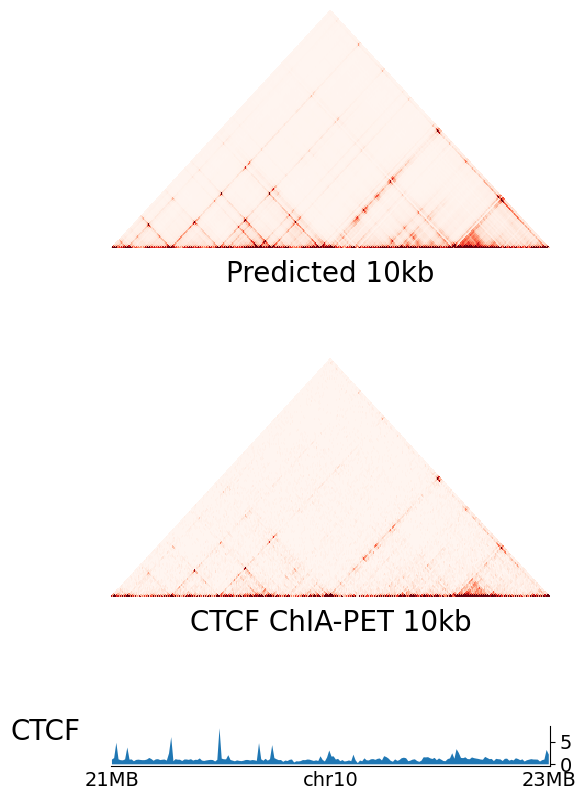

In [ ]:
cellline = 'GM12878'
# load data
hic = np.load('/home/dh/work/gChIA/results/250303_10000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878/predictions/pred_matrix_chr10_21000000_23000000.npy')
hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
bw = pyBigWig.open('/home/dh/work/gChIA/data/GM12878/bigWig_files/GM12878_ctcf.bw')
ctcf = bw.stats('chr10', 21000000, 23000000, type='mean', nBins=hic.shape[0])
ctcf = np.array(ctcf)

# Close the BigWig file
bw.close()

epi_list = [ctcf]
# real data
chiapet = '/home/dh/work/gChIA/data/GM12878/CTCF_ChIA-PET/ENCFF379AWZ.hic'
rpet = _read_hic_matrix(chiapet, 'chr10', 21000000, 23000000, 10000,log1p=False)
rhic = '/home/dh/work/gChIA/data/GM12878/Hi-C/4DNFI1UEG1HD.hic'
rhic = _read_hic_matrix(rhic, 'chr10', 21000000, 23000000, 10000,log1p=False)
rhic = np.nan_to_num(rhic)
visualize_multiple_HiC_with_epigenetics([hic,rpet], epi_list,hic_labels=['Predicted 10kb','CTCF ChIA-PET 10kb'],epi_labels=['CTCF'],x_ticks=['21MB','chr10','23MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    output=f'{outputpath}/GM12878_10kb_ctcf.png')


## 5kb

In [6]:
# load data
hic = np.load('/home/dh/work/gChIA/results/250304_5000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_True/GM12878/predictions/pred_matrix_chr10_21000000_23000000.npy')
hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
bw = pyBigWig.open('/home/dh/work/gChIA/data/GM12878/bigWig_files/GM12878_ctcf.bw')
ctcf = bw.stats('chr10', 21000000, 23000000, type='mean', nBins=hic.shape[0])
ctcf = np.array(ctcf)

# Close the BigWig file
bw.close()

epi_list = [ctcf]
# real data
chiapet = '/home/dh/work/gChIA/data/GM12878/CTCF_ChIA-PET/ENCFF379AWZ.hic'
rpet = _read_hic_matrix(chiapet, 'chr10', 21000000, 23000000, 5000,log1p=False)
rhic = '/home/dh/work/gChIA/data/GM12878/Hi-C/4DNFI1UEG1HD.hic'
rhic = _read_hic_matrix(rhic, 'chr10', 21000000, 23000000, 5000,log1p=False)
rhic = np.nan_to_num(rhic)


Plot saved to /home/dh/work/gChIA/src/gchia/Figure/2/CTCF/GM12878_5kb_ctcf.png


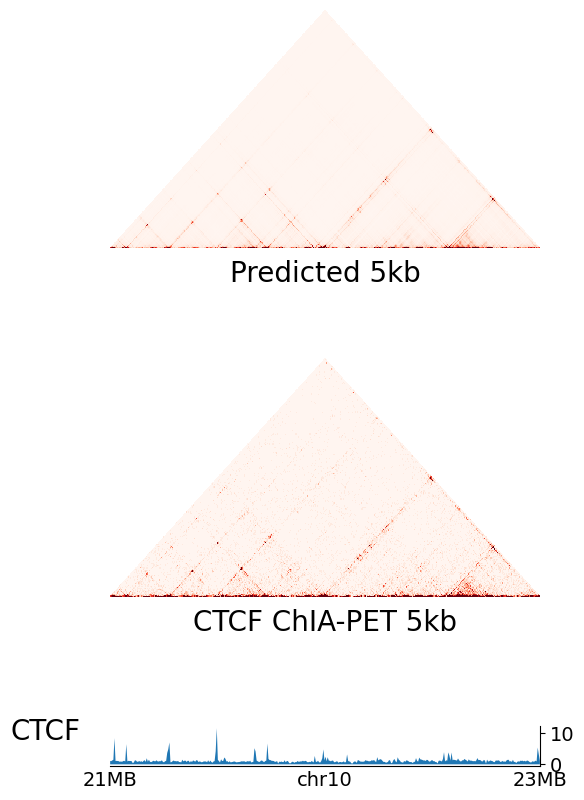

In [7]:
visualize_multiple_HiC_with_epigenetics([hic,rpet], epi_list,hic_labels=['Predicted 5kb','CTCF ChIA-PET 5kb'],epi_labels=['CTCF'],x_ticks=['21MB','chr10','23MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    output=f'{outputpath}/GM12878_5kb_ctcf.png')

## 1kb

In [8]:
# load data
hic = np.load('/home/dh/work/gChIA/results/250331_GM12878_1000_NONE_ChIAPETMatrixPredictor_efeaturesq_high_CTCF_ChIA-PET_log1p_true_hictype_hic_chiatype_hic/GM12878/predictions/pred_matrix_chr10_21000000_21500000.npy')
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
bw = pyBigWig.open('/home/dh/work/gChIA/data/GM12878/bigWig_files/GM12878_ctcf.bw')
ctcf = bw.stats('chr10', 21000000, 21500000, type='mean', nBins=hic.shape[0])
ctcf = np.array(ctcf)

# Close the BigWig file
bw.close()

epi_list = [ctcf]
# real data
chiapet = '/home/dh/work/gChIA/data/GM12878/CTCF_ChIA-PET/ENCFF379AWZ.hic'
rpet = _read_hic_matrix(chiapet, 'chr10', 21000000, 21500000, 1000,log1p=False)
rhic = '/home/dh/work/gChIA/data/GM12878/Hi-C/4DNFI1UEG1HD.hic'
rhic = _read_hic_matrix(rhic, 'chr10', 21000000, 21500000, 1000,log1p=False)
rhic = np.nan_to_num(rhic)

Plot saved to /home/dh/work/gChIA/src/gchia/Figure/2/CTCF/GM12878_1kb_ctcf.png


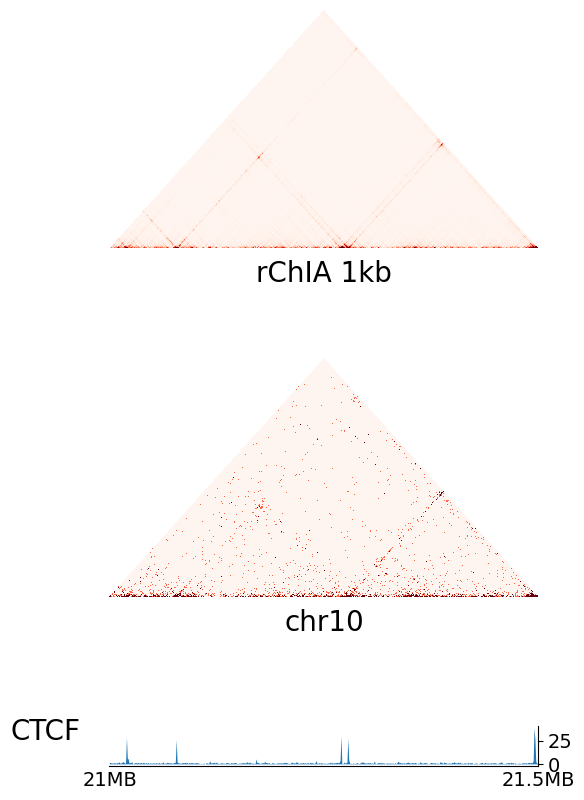

In [9]:
visualize_multiple_HiC_with_epigenetics([hic,rpet], epi_list,hic_labels=['rChIA 1kb','chr10','ChIA-PET 1kb'],epi_labels=['CTCF'],x_ticks=['21MB','21.5MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    output=f'{outputpath}/GM12878_1kb_ctcf.png')

# RAD21

In [10]:
outputpath = '/home/dh/work/gChIA/src/gchia/Figure/2/RAD21'

## 10KB

Plot saved to /home/dh/work/gChIA/src/gchia/Figure/2/RAD21/GM12878_10kb_RAD21.png


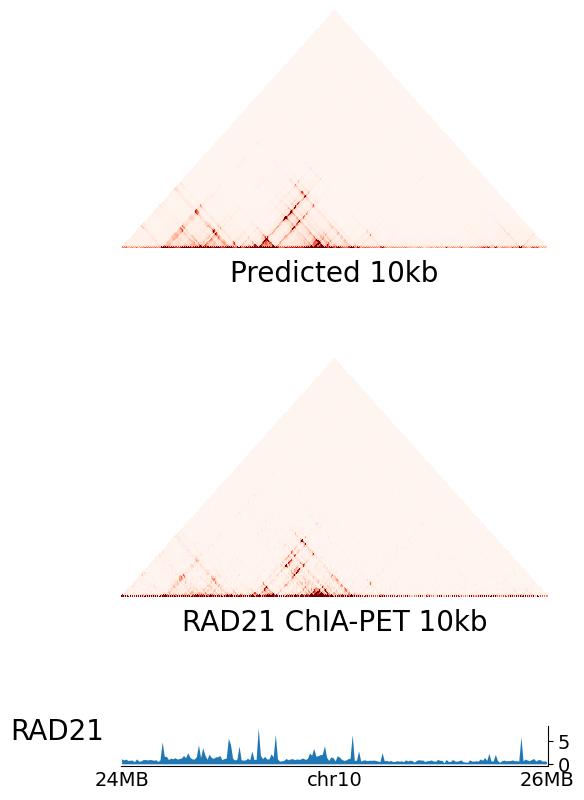

In [ ]:
cellline = 'GM12878'
# load data
# load data
start = 24000000
end = 26000000
resolution = 10000
epxname = '250316_GM12878_10000_NONE_ChIAPETMatrixmaskdictor_efeaturesq_high_RAD21_ChIA-PET_log1p_true'
hic = np.load(f'/home/dh/work/gChIA/results/{epxname}/{cellline}/predictions/pred_matrix_chr10_{start}_{end}.npy')
hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
bw = pyBigWig.open(f'/home/dh/work/gChIA/data/{cellline}/bigWig_files/{cellline}_RAD21.bw')
ctcf = bw.stats('chr10', start, end, type='mean', nBins=hic.shape[0])
ctcf = np.array(ctcf)

# Close the BigWig file
bw.close()

epi_list = [ctcf]
# real data
chiapet = '/home/dh/work/gChIA/data/GM12878/RAD21_ChIA-PET/ENCFF416RNE.hic'
rpet = _read_hic_matrix(chiapet, 'chr10',start, end, resolution,log1p=False)
rhic = '/home/dh/work/gChIA/data/GM12878/Hi-C/4DNFI1UEG1HD.hic'
rhic = _read_hic_matrix(rhic, 'chr10', start, end, resolution,log1p=False)
rhic = np.nan_to_num(rhic)
visualize_multiple_HiC_with_epigenetics([hic,rpet], epi_list,hic_labels=['Predicted 10kb','RAD21 ChIA-PET 10kb'],epi_labels=['RAD21'],x_ticks=['24MB','chr10','26MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    output=f'{outputpath}/GM12878_10kb_RAD21.png')


## 5KB

Plot saved to /home/dh/work/gChIA/src/gchia/Figure/2/RAD21/GM12878_5kb_RAD21.png


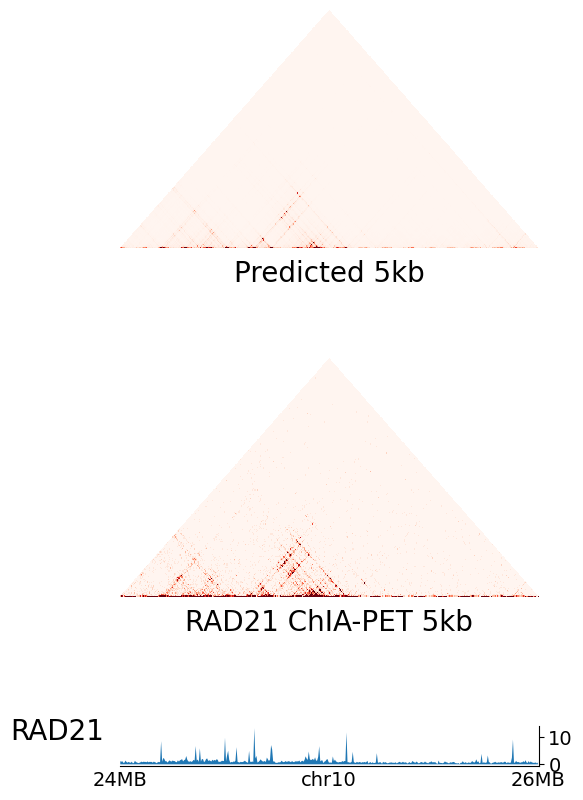

In [12]:
cellline = 'GM12878'
# load data
# load data
start = 24000000
end = 26000000
resolution = 5000
epxname = '250316_GM12878_5000_NONE_ChIAPETMatrixPredictor_efeaturesq_high_RAD21_ChIA-PET_log1p_true'
hic = np.load(f'/home/dh/work/gChIA/results/{epxname}/{cellline}/predictions/pred_matrix_chr10_{start}_{end}.npy')
hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
bw = pyBigWig.open(f'/home/dh/work/gChIA/data/{cellline}/bigWig_files/{cellline}_RAD21.bw')
ctcf = bw.stats('chr10', start, end, type='mean', nBins=hic.shape[0])
ctcf = np.array(ctcf)

# Close the BigWig file
bw.close()

epi_list = [ctcf]
# real data
chiapet = '/home/dh/work/gChIA/data/GM12878/RAD21_ChIA-PET/ENCFF416RNE.hic'
rpet = _read_hic_matrix(chiapet, 'chr10',start, end, resolution,log1p=False)
rhic = '/home/dh/work/gChIA/data/GM12878/Hi-C/4DNFI1UEG1HD.hic'
rhic = _read_hic_matrix(rhic, 'chr10', start, end, resolution,log1p=False)
rhic = np.nan_to_num(rhic)
visualize_multiple_HiC_with_epigenetics([hic,rpet], epi_list,hic_labels=['Predicted 5kb','RAD21 ChIA-PET 5kb'],epi_labels=['RAD21'],x_ticks=['24MB','chr10','26MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    output=f'{outputpath}/GM12878_5kb_RAD21.png')


## 1KB

Plot saved to /home/dh/work/gChIA/src/gchia/Figure/2/RAD21/GM12878_1kb_RAD21.png


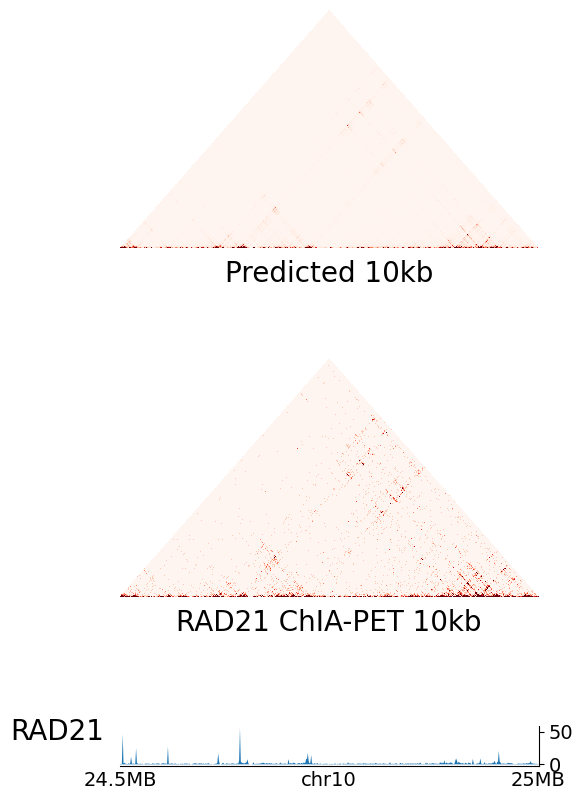

In [13]:
cellline = 'GM12878'
# load data
# load data
start = 24500000
end = 25000000
resolution = 1000
epxname = '250317_GM12878_1000_NONE_ChIAPETMatrixPredictor_efeaturesq_high_RAD21_ChIA-PET_log1p_true'
hic = np.load(f'/home/dh/work/gChIA/results/{epxname}/{cellline}/predictions/pred_matrix_chr10_{start}_{end}.npy')
hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
bw = pyBigWig.open(f'/home/dh/work/gChIA/data/{cellline}/bigWig_files/{cellline}_RAD21.bw')
ctcf = bw.stats('chr10', start, end, type='mean', nBins=hic.shape[0])
ctcf = np.array(ctcf)

# Close the BigWig file
bw.close()

epi_list = [ctcf]
# real data
chiapet = '/home/dh/work/gChIA/data/GM12878/RAD21_ChIA-PET/ENCFF416RNE.hic'
rpet = _read_hic_matrix(chiapet, 'chr10',start, end, resolution,log1p=False)
rhic = '/home/dh/work/gChIA/data/GM12878/Hi-C/4DNFI1UEG1HD.hic'
rhic = _read_hic_matrix(rhic, 'chr10', start, end, resolution,log1p=False)
rhic = np.nan_to_num(rhic)
visualize_multiple_HiC_with_epigenetics([hic,rpet], epi_list,hic_labels=['Predicted 10kb','RAD21 ChIA-PET 10kb'],epi_labels=['RAD21'],x_ticks=['24.5MB','chr10','25MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    output=f'{outputpath}/GM12878_1kb_RAD21.png')


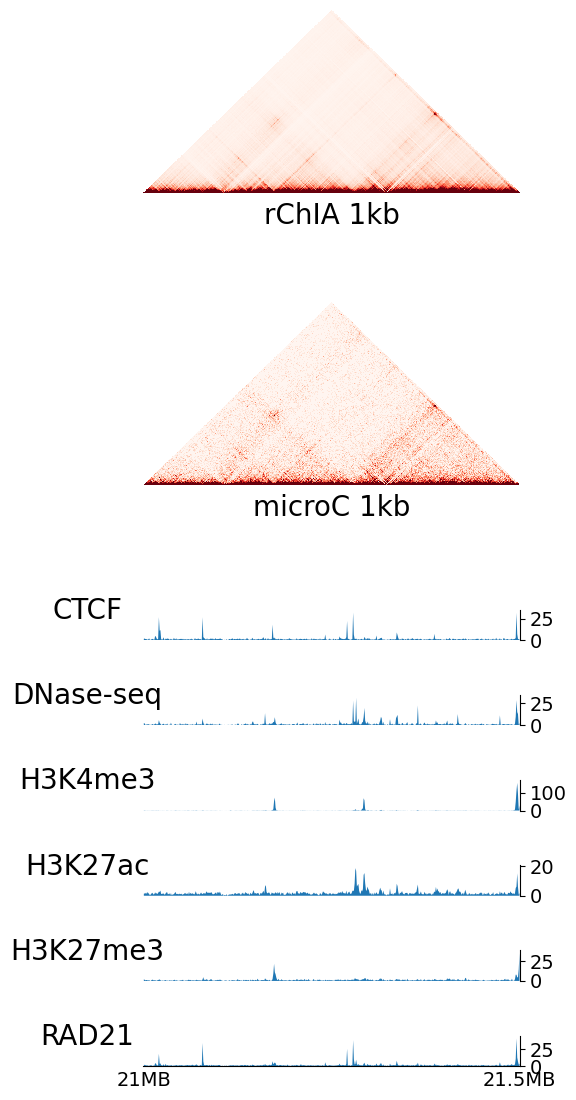

In [46]:
visualize_multiple_HiC_with_epigenetics([hic,rpet], epi_list,hic_labels=['rChIA 1kb','microC 1kb'],x_ticks=['21MB','21.5MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0,
    epi_labels=['CTCF','DNase-seq','H3K4me3','H3K27ac','H3K27me3','RAD21'],maxperc=97)

# 跨细胞系

## 10kb

In [ ]:
realhic = '/home/dh/work/gChIA/data/IMR90/4DNFIH7TH4MF.hic'
chiapet = '/home/dh/work/gChIA/data/IMR90/CTCF_ChIA-PET/ENCFF934OLI.hic'
# load data
hic = np.load('/home/dh/work/gChIA/results/250303_10000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878toIMR90/predictions/pred_matrix_chr10_21000000_23000000.npy')
hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
bw = pyBigWig.open('/home/dh/work/gChIA/data/IMR90/bigWig_files/IMR90_ctcf.bw')
ctcf = bw.stats('chr10', 21000000, 23000000, type='mean', nBins=hic.shape[0])
ctcf = np.array(ctcf)

# Close the BigWig file
bw.close()

epi_list = [ctcf]
# real data

rpet = _read_hic_matrix(chiapet, 'chr10', 21000000, 23000000, 10000,log1p=False)

rhic = _read_hic_matrix(realhic, 'chr10', 21000000, 23000000, 10000,log1p=False)

visualize_multiple_HiC_with_epigenetics([hic,rpet], epi_list,hic_labels=['rChIA 10kb','ChIA-PET 10kb'],epi_labels=['CTCF'],x_ticks=['21MB','23MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05)

## 5kb

In [ ]:
hic = np.load('/home/dh/work/gChIA/results/250304_5000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_True/GM12878toIMR90/predictions/pred_matrix_chr10_21000000_23000000.npy')
hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
bw = pyBigWig.open('/home/dh/work/gChIA/data/IMR90/bigWig_files/IMR90_ctcf.bw')
ctcf = bw.stats('chr10', 21000000, 23000000, type='mean', nBins=hic.shape[0])
ctcf = np.array(ctcf)

# Close the BigWig file
bw.close()

epi_list = [ctcf]
# real data

rpet = _read_hic_matrix(chiapet, 'chr10', 21000000, 23000000, 5000,log1p=False)

rhic = _read_hic_matrix(realhic, 'chr10', 21000000, 23000000, 5000,log1p=False)
visualize_multiple_HiC_with_epigenetics([hic,rpet], epi_list,hic_labels=['rChIA 5kb','ChIA-PET 5kb'],epi_labels=['CTCF'],x_ticks=['21MB','23MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05)

In [ ]:
hic = np.load('/home/dh/work/gChIA/results/250307_1000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878toIMR90/predictions/pred_matrix_chr10_21000000_21500000.npy')
hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
bw = pyBigWig.open('/home/dh/work/gChIA/data/IMR90/bigWig_files/IMR90_ctcf.bw')
ctcf = bw.stats('chr10', 21000000, 23000000, type='mean', nBins=hic.shape[0])
ctcf = np.array(ctcf)

# Close the BigWig file
bw.close()

epi_list = [ctcf]
# real data

rpet = _read_hic_matrix(chiapet, 'chr10', 21000000, 21500000, 1000,log1p=False)

rhic = _read_hic_matrix(realhic, 'chr10', 21000000, 21500000, 1000,log1p=False)
visualize_multiple_HiC_with_epigenetics([hic,rpet], epi_list,hic_labels=['rChIA 1kb','ChIA-PET 1kb'],epi_labels=['CTCF'],x_ticks=['21MB','21.5MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05)

Plot saved to /home/dh/work/gChIA/src/gchia/Figure/5/IMR90_10kb_ctcf.png


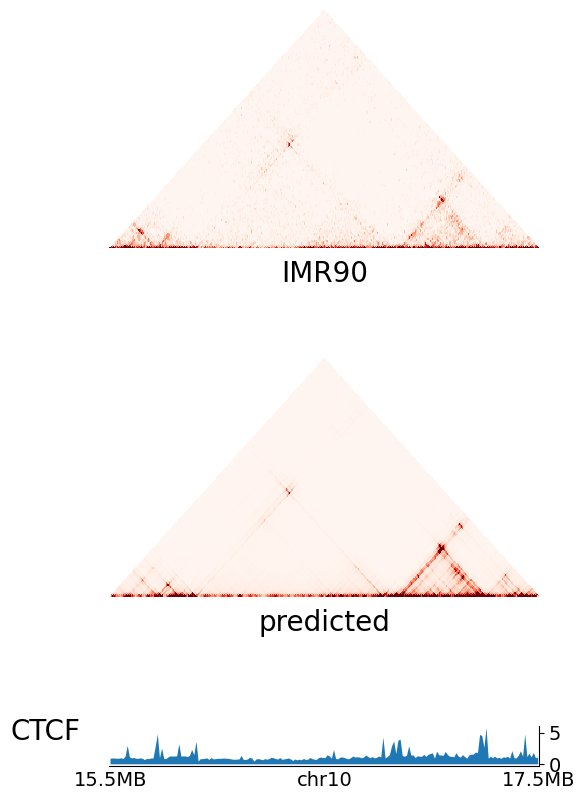

Plot saved to /home/dh/work/gChIA/src/gchia/Figure/5/GM12878_10kb_ctcf.png


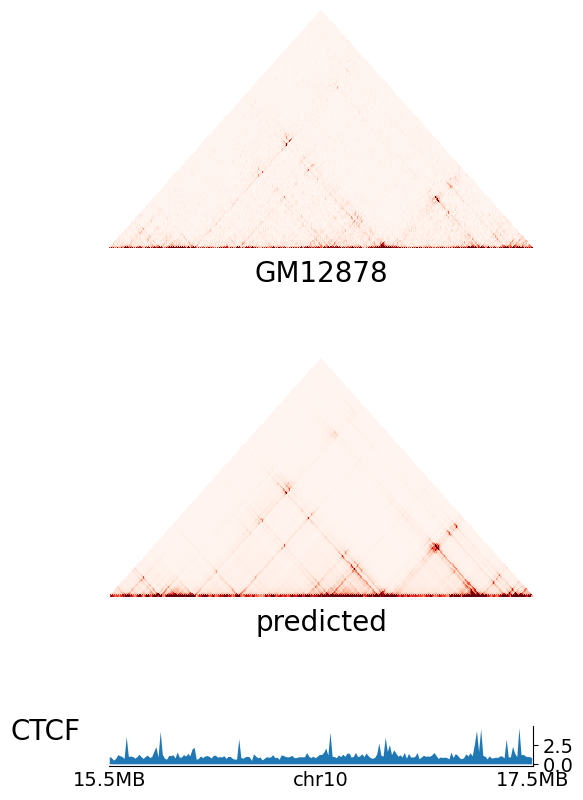

In [ ]:
cellline = 'GM12878'
# load data
# hic = np.load('/home/dh/work/gChIA/results/250303_10000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878/predictions/pred_matrix_chr10_21000000_23000000.npy')
# hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi



start = 15500000
end = start + 2000000
# real data
hic = np.load(f'/home/dh/work/gChIA/results/250303_10000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878/predictions/pred_matrix_chr10_{start}_{end}.npy')
hic = np.expm1(hic)
bwGM = pyBigWig.open('/home/dh/work/gChIA/data/GM12878/bigWig_files/GM12878_ctcf.bw')
ctcfGM = bwGM.stats('chr10', start, end, type='mean', nBins=hic.shape[0])
ctcfGM = np.array(ctcfGM)
epi_listGM = [ctcfGM]
bwIMR = pyBigWig.open('/home/dh/work/gChIA/data/IMR90/bigWig_files/IMR90_ctcf.bw')
ctcfIMR = bwIMR.stats('chr10', start, end, type='mean', nBins=hic.shape[0])
ctcfIMR = np.array(ctcfIMR)
epi_listIMR = [ctcfIMR]
# Close the BigWig file
bw.close()
hicIM = np.load(f'/home/dh/work/gChIA/results/250303_10000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878toIMR90/predictions/pred_matrix_chr10_{start}_{end}.npy')
hicIM = np.expm1(hicIM)
chiapet = '/home/dh/work/gChIA/data/GM12878/CTCF_ChIA-PET/ENCFF379AWZ.hic'
rpet = _read_hic_matrix(chiapet, 'chr10', start, end, 10000,log1p=False)
rhic = '/home/dh/work/gChIA/data/IMR90/CTCF_ChIA-PET/ENCFF934OLI.hic'
rhic = _read_hic_matrix(rhic, 'chr10', start, end, 10000,log1p=False)
rhic = np.nan_to_num(rhic)
outputpath = '/home/dh/work/gChIA/src/gchia/Figure/5'
visualize_multiple_HiC_with_epigenetics([rhic,hicIM], epi_listIMR,hic_labels=['IMR90','predicted'],epi_labels=['CTCF'],x_ticks=[f'{start/1000000}MB','chr10',f'{end/1000000}MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    output=f'{outputpath}/IMR90_10kb_ctcf.png')
visualize_multiple_HiC_with_epigenetics([rpet,hic], epi_listGM,hic_labels=['GM12878','predicted'],epi_labels=['CTCF'],x_ticks=[f'{start/1000000}MB','chr10',f'{end/1000000}MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    output=f'{outputpath}/GM12878_10kb_ctcf.png'
    )




# High-resulotion

Plot saved to /home/dh/work/gChIA/src/gchia/Figure/6/GM12878_1kb_ctcf.png


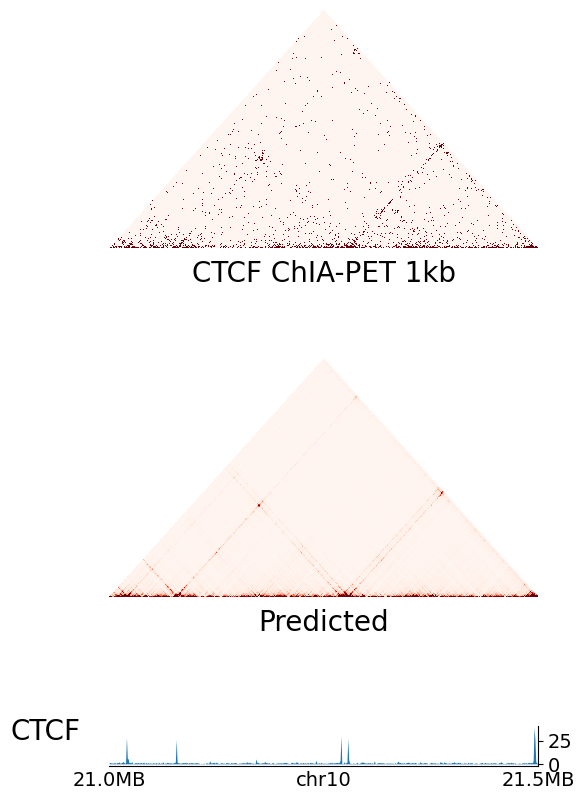

In [99]:
cellline = 'GM12878'
# load data
# hic = np.load('/home/dh/work/gChIA/results/250303_10000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878/predictions/pred_matrix_chr10_21000000_23000000.npy')
# hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
start = 21000000
end = start + 500000
# real data
prepath = '/home/dh/work/gChIA/results/250307_1000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878/predictions'
datapath = f'/home/dh/work/gChIA/data/{cellline}/bigWig_files'
pre = np.load(f'{prepath}/pred_matrix_chr10_{start}_{end}.npy')
pre = np.expm1(pre)
bwlist = ['ctcf']
bw = []
for i in bwlist:
    bw.append(pyBigWig.open(f'{datapath}/{cellline}_{i}.bw'))
epi_list = []
for i in range(len(bwlist)):
    bwf = bw[i].stats('chr10', start, end, type='mean', nBins=pre.shape[0])
    bwn = np.array(bwf)
    bw[i].close()
    epi_list.append(bwf)

# Close the BigWig file

realpath = '/home/dh/work/gChIA/data/GM12878/CTCF_ChIA-PET/ENCFF379AWZ.hic'
rpet = _read_hic_matrix(realpath, 'chr10', start, end, 1000,log1p=False)
outputpath = '/home/dh/work/gChIA/src/gchia/Figure/6'
os.path.exists(outputpath) or os.makedirs(outputpath)
visualize_multiple_HiC_with_epigenetics([rpet,pre], epi_list,hic_labels=['CTCF ChIA-PET 1kb','Predicted'],epi_labels=['CTCF'],x_ticks=[f'{start/1000000}MB','chr10',f'{end/1000000}MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    output=f'{outputpath}/{cellline}_1kb_ctcf.png',
    maxperc=99)





/home/dh/work/gChIA/data/H1-hESC/bigWig_files/H1-hESC_ctcf.bw
/home/dh/work/gChIA/data/H1-hESC/bigWig_files/H1-hESC_DNase-seq.bw
/home/dh/work/gChIA/data/H1-hESC/bigWig_files/H1-hESC_H3K27ac.bw
Plot saved to /home/dh/work/gChIA/src/gchia/Figure/6/H1-hESC_1kb_micro.png


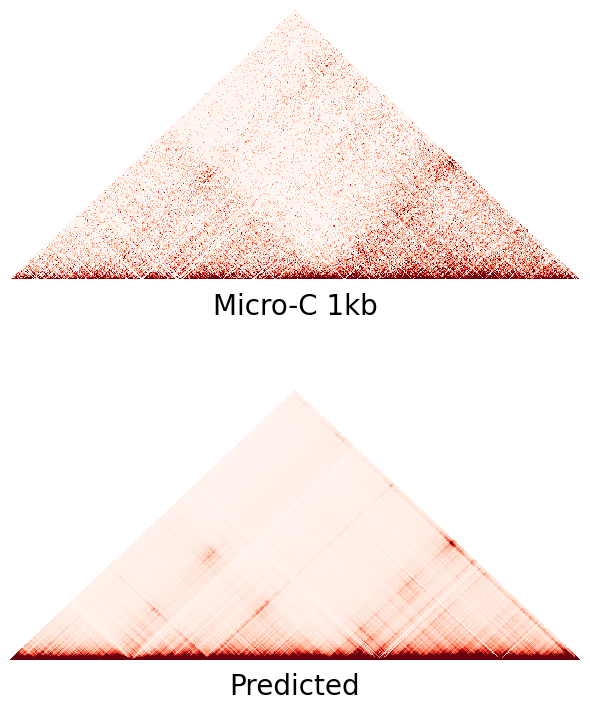

In [10]:
cellline = 'H1-hESC'
# load data
# hic = np.load('/home/dh/work/gChIA/results/250303_10000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878/predictions/pred_matrix_chr10_21000000_23000000.npy')
# hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
start = 21000000
end = start + 500000
# real data
prepath = '/home/dh/work/gChIA/results/250414_H1-hESC_1000_NONE_ChIAPETMatrixPredictor_efeaturesq_high_micro-c_log1p_true_hictype_hic_chiatype_hic_PREDICT_ONLY_hicres_5000/H1-hESCtoH1-hESC/predictions'
datapath = f'/home/dh/work/gChIA/data/{cellline}/bigWig_files'
pre = np.load(f'{prepath}/pred_matrix_chr10_{start}_{end}.npy')
pre = np.expm1(pre)
bwlist = ['ctcf','DNase-seq','H3K27ac']
bw = []
for i in bwlist:
    print(f'{datapath}/{cellline}_{i}.bw')
    bw.append(pyBigWig.open(f'{datapath}/{cellline}_{i}.bw'))
epi_list = []
for i in range(len(bwlist)):
    bwf = bw[i].stats('chr10', start, end, type='mean', nBins=pre.shape[0])
    bwn = np.array(bwf)
    bw[i].close()
    epi_list.append(bwf)

# Close the BigWig file

realpath = '/home/dh/work/gChIA/data/IMR90/Hi-C/4DNFIH7TH4MF.hic'
rpet = _read_hic_matrix(realpath, 'chr10', start, end, 1000,log1p=False)
outputpath = '/home/dh/work/gChIA/src/gchia/Figure/6'
os.path.exists(outputpath) or os.makedirs(outputpath)
visualize_multiple_HiC_with_epigenetics([rpet,pre],hic_labels=['Micro-C 1kb','Predicted'],x_ticks=[f'{start/1000000}MB','chr10',f'{end/1000000}MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    output=f'{outputpath}/{cellline}_1kb_micro.png',
    maxperc=97)





/home/dh/work/gChIA/data/GM12878/bigWig_files/GM12878_ctcf.bw
/home/dh/work/gChIA/data/GM12878/bigWig_files/GM12878_DNase-seq.bw
/home/dh/work/gChIA/data/GM12878/bigWig_files/GM12878_H3K27ac.bw


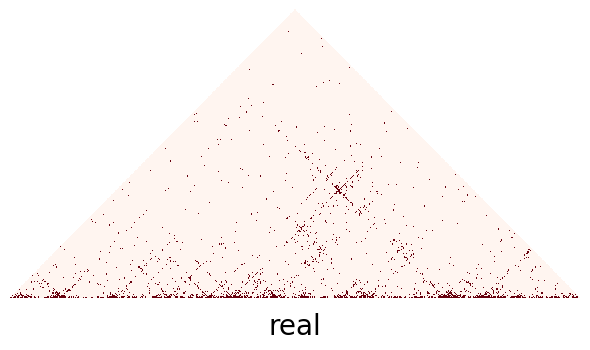

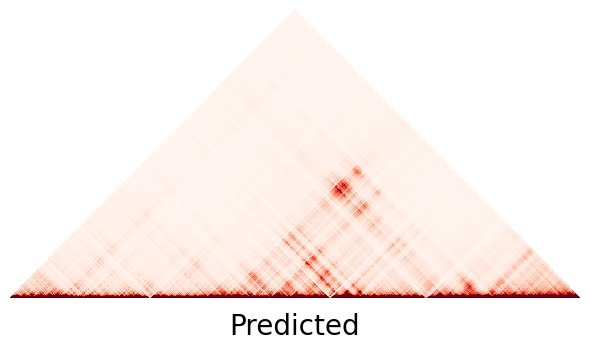

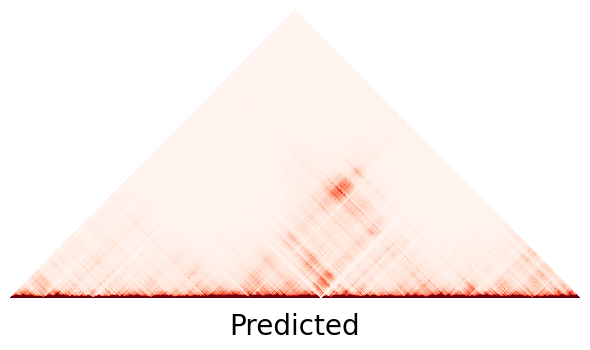

In [28]:
cellline = 'GM12878'
# load data
# hic = np.load('/home/dh/work/gChIA/results/250303_10000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878/predictions/pred_matrix_chr10_21000000_23000000.npy')
# hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
start = 2000000
end = start + 500000
# real data
prepath = '/home/dh/work/gChIA/results/250422_H1-hESC_1000_NONE_ChIAPETMatrixPredictor_efeaturesq_high_micro-c_log1p_true_hictype_hic_chiatype_hic_hicres_5000/GM12878/predictions'
datapath = f'/home/dh/work/gChIA/data/{cellline}/bigWig_files'
pre = np.load(f'{prepath}/pred_matrix_chr1_{start}_{end}.npy')
pre = np.expm1(pre)
bwlist = ['ctcf','DNase-seq','H3K27ac']
bw = []
for i in bwlist:
    print(f'{datapath}/{cellline}_{i}.bw')
    bw.append(pyBigWig.open(f'{datapath}/{cellline}_{i}.bw'))
epi_list = []
for i in range(len(bwlist)):
    bwf = bw[i].stats('chr10', start, end, type='mean', nBins=pre.shape[0])
    bwn = np.array(bwf)
    bw[i].close()
    epi_list.append(bwf)

# Close the BigWig file

realpath = '/home/dh/work/gChIA/data/GM12878/CTCF_ChIA-PET/ENCFF379AWZ.hic'
rpet = _read_hic_matrix(realpath, 'chr1', start, end, 1000,log1p=False)

maskpath = '/home/dh/work/gChIA/results/250422_H1-hESC_1000_NONE_ChIAPETMatrixPredictor_efeaturesq_high_micro-c_log1p_true_hictype_hic_chiatype_hic_hicres_5000/GM12878/predictions_masked_1_2_3_4_5'
mask = np.load(f'{maskpath}/pred_matrix_chr1_{start}_{end}.npy')
mask = np.expm1(mask)
os.path.exists(outputpath) or os.makedirs(outputpath)
visualize_multiple_HiC_with_epigenetics([rpet],hic_labels=['real'],x_ticks=[f'{start/1000000}MB','chr10',f'{end/1000000}MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    maxperc=99)
visualize_multiple_HiC_with_epigenetics([pre],hic_labels=['Predicted'],x_ticks=[f'{start/1000000}MB','chr10',f'{end/1000000}MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    maxperc=98)
visualize_multiple_HiC_with_epigenetics([mask],hic_labels=['Predicted'],x_ticks=[f'{start/1000000}MB','chr10',f'{end/1000000}MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    maxperc=98)


/home/dh/work/gChIA/data/GM12878/bigWig_files/GM12878_ctcf.bw
/home/dh/work/gChIA/data/GM12878/bigWig_files/GM12878_DNase-seq.bw
/home/dh/work/gChIA/data/GM12878/bigWig_files/GM12878_H3K27ac.bw


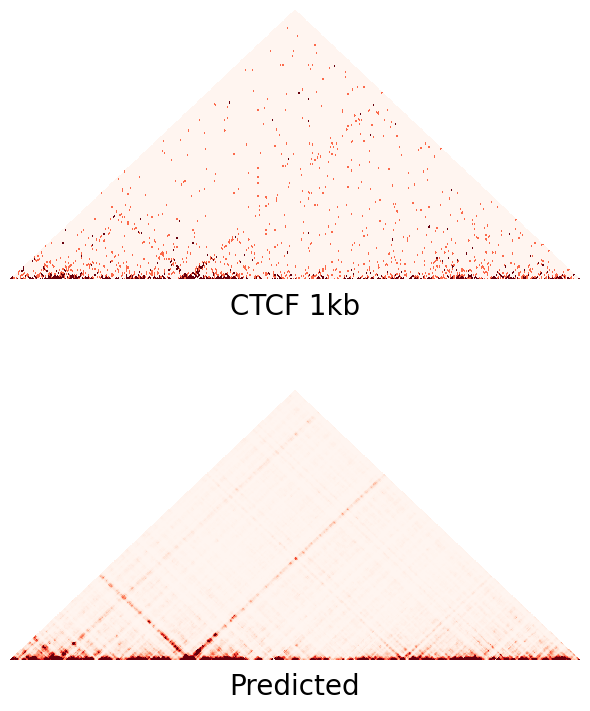

In [4]:
cellline = 'GM12878'
# load data
# hic = np.load('/home/dh/work/gChIA/results/250303_10000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878/predictions/pred_matrix_chr10_21000000_23000000.npy')
# hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
start = 21000000
end = start + 250000
# real data
prepath = '/home/dh/work/gChIA/results/250424_GM12878_200_NONE_ChIAPETMatrixPredictor_efeaturesq_super_CTCF_ChIA-PET_log1p_true_hictype_hic_chiatype_hic_hicres_1000_interpolate_5x/GM12878/predictions/'
datapath = f'/home/dh/work/gChIA/data/{cellline}/bigWig_files'
pre = np.load(f'{prepath}/pred_matrix_chr10_{start}_{end}.npy')
pre = np.expm1(pre)
bwlist = ['ctcf','DNase-seq','H3K27ac']
bw = []
for i in bwlist:
    print(f'{datapath}/{cellline}_{i}.bw')
    bw.append(pyBigWig.open(f'{datapath}/{cellline}_{i}.bw'))
epi_list = []
for i in range(len(bwlist)):
    bwf = bw[i].stats('chr10', start, end, type='mean', nBins=pre.shape[0])
    bwn = np.array(bwf)
    bw[i].close()
    epi_list.append(bwf)

# Close the BigWig file

realpath = '/home/dh/work/gChIA/data/GM12878/CTCF_ChIA-PET/ENCFF379AWZ.hic'
rpet = _read_hic_matrix(realpath, 'chr10', start, end, 1000,log1p=False)

visualize_multiple_HiC_with_epigenetics([rpet,pre],hic_labels=['CTCF 1kb','Predicted'],x_ticks=[f'{start/1000000}MB','chr10',f'{end/1000000}MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    maxperc=99)





# 超分辨率

Plot saved to /home/dh/work/gChIA/src/gchia/Figure/7/GM12878_10kb_ctcf.png


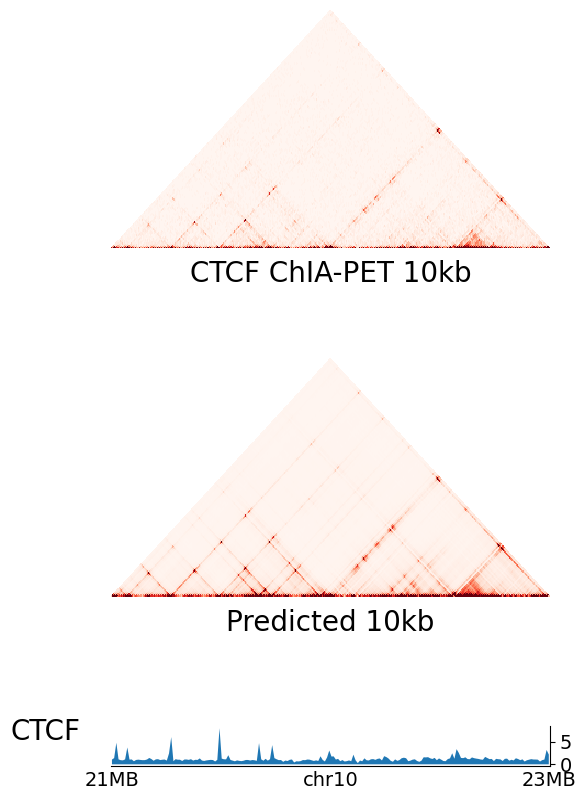

In [20]:
cellline = 'GM12878'
outputpath = '/home/dh/work/gChIA/src/gchia/Figure/7'
os.path.exists(outputpath) or os.makedirs(outputpath)
# load data
hic = np.load('/home/dh/work/gChIA/results/250303_10000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878/predictions/pred_matrix_chr10_21000000_23000000.npy')
hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
bw = pyBigWig.open('/home/dh/work/gChIA/data/GM12878/bigWig_files/GM12878_ctcf.bw')
ctcf = bw.stats('chr10', 21000000, 23000000, type='mean', nBins=hic.shape[0])
ctcf = np.array(ctcf)

# Close the BigWig file
bw.close()

epi_list = [ctcf]
# real data
chiapet = '/home/dh/work/gChIA/data/GM12878/CTCF_ChIA-PET/ENCFF379AWZ.hic'
rpet = _read_hic_matrix(chiapet, 'chr10', 21000000, 23000000, 10000,log1p=False)
rhic = '/home/dh/work/gChIA/data/GM12878/Hi-C/4DNFI1UEG1HD.hic'
rhic = _read_hic_matrix(rhic, 'chr10', 21000000, 23000000, 10000,log1p=False)
rhic = np.nan_to_num(rhic)
visualize_multiple_HiC_with_epigenetics([rpet,hic], epi_list,hic_labels=['CTCF ChIA-PET 10kb','Predicted 10kb'],epi_labels=['CTCF'],x_ticks=['21MB','chr10','23MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    output=f'{outputpath}/GM12878_10kb_ctcf.png',
    fig_width=6)


/home/dh/work/gChIA/data/GM12878/bigWig_files/GM12878_ctcf.bw
Percentage of non-zero values: 0.30%
16.0
4621
Plot saved to /home/dh/work/gChIA/src/gchia/Figure/7/GM12878_200bp_ctcf.png


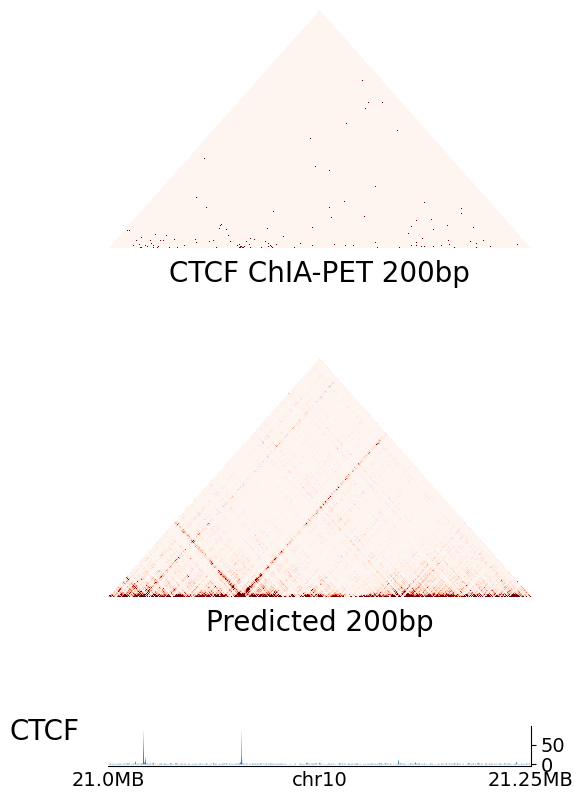

In [25]:
cellline = 'GM12878'
# load data
# hic = np.load('/home/dh/work/gChIA/results/250303_10000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878/predictions/pred_matrix_chr10_21000000_23000000.npy')
# hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
start = 21000000
end = start + 250000
# real data
prepath = '/home/dh/work/gChIA/results/250506_GM12878_200_NONE_ChIAPETMatrixPredictor_efeaturesq_super_CTCF_ChIA-PET_HIGH_log1p_true_hictype_hic_chiatype_hic_hicres_1000/GM12878/predictions'
datapath = f'/home/dh/work/gChIA/data/{cellline}/bigWig_files'
pre = np.load(f'{prepath}/pred_matrix_chr10_{start}_{end}.npy')
pre = np.expm1(pre)
bwlist = ['ctcf']
bw = []
for i in bwlist:
    print(f'{datapath}/{cellline}_{i}.bw')
    bw.append(pyBigWig.open(f'{datapath}/{cellline}_{i}.bw'))
epi_list = []
for i in range(len(bwlist)):
    bwf = bw[i].stats('chr10', start, end, type='mean', nBins=pre.shape[0])
    bwn = np.array(bwf)
    bw[i].close()
    epi_list.append(bwf)

# Close the BigWig file

realpath = '/home/dh/work/gChIA/data/GM12878/CTCF_ChIA-PET/ENCFF379AWZ.hic'
rpet = _read_hic_matrix(realpath, 'chr10', start, end, 1000,log1p=False)
realpath200 = '/home/dh/work/gChIA/data/GM12878/CTCF_ChIA-PET_HIGH/200bp.hic'
rpet200 = _read_hic_matrix(realpath200, 'chr10', start, end, 200,log1p=False)
# print(rpet200)
count = np.count_nonzero(rpet200)
# 计算非0值百分比
total = rpet200.size
percentage = count / total * 100
count2 = np.max(rpet200)
print(f"Percentage of non-zero values: {percentage:.2f}%")
print(count2)
print(count)
visualize_multiple_HiC_with_epigenetics([rpet200,pre],epi_list,hic_labels=['CTCF ChIA-PET 200bp','Predicted 200bp'],epi_labels=['CTCF'],x_ticks=[f'{start/1000000}MB','chr10',f'{end/1000000}MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    maxperc=99,
    cmap='Reds',
    fig_width=6,
    output=f'{outputpath}/GM12878_200bp_ctcf.png',
)




Plot saved to /home/dh/work/gChIA/src/gchia/Figure/7/GM12878_1kb_ctcf.png


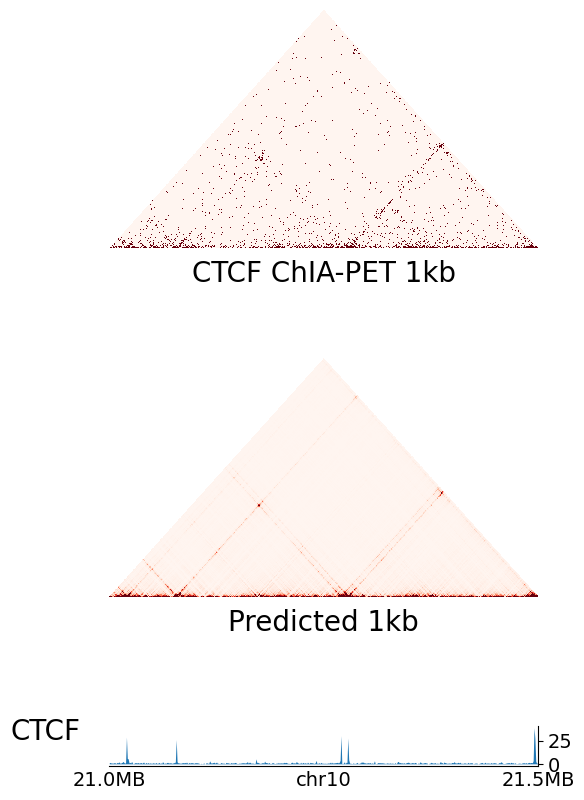

In [26]:
cellline = 'GM12878'
# load data
# hic = np.load('/home/dh/work/gChIA/results/250303_10000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878/predictions/pred_matrix_chr10_21000000_23000000.npy')
# hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
start = 21000000
end = start + 500000
# real data
prepath = '/home/dh/work/gChIA/results/250307_1000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878/predictions'
datapath = f'/home/dh/work/gChIA/data/{cellline}/bigWig_files'
pre = np.load(f'{prepath}/pred_matrix_chr10_{start}_{end}.npy')
pre = np.expm1(pre)
bwlist = ['ctcf']
bw = []
for i in bwlist:
    bw.append(pyBigWig.open(f'{datapath}/{cellline}_{i}.bw'))
epi_list = []
for i in range(len(bwlist)):
    bwf = bw[i].stats('chr10', start, end, type='mean', nBins=pre.shape[0])
    bwn = np.array(bwf)
    bw[i].close()
    epi_list.append(bwf)

# Close the BigWig file

realpath = '/home/dh/work/gChIA/data/GM12878/CTCF_ChIA-PET/ENCFF379AWZ.hic'
rpet = _read_hic_matrix(realpath, 'chr10', start, end, 1000,log1p=False)
visualize_multiple_HiC_with_epigenetics([rpet,pre], epi_list,hic_labels=['CTCF ChIA-PET 1kb','Predicted 1kb'],epi_labels=['CTCF'],x_ticks=[f'{start/1000000}MB','chr10',f'{end/1000000}MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    output=f'{outputpath}/{cellline}_1kb_ctcf.png',
    maxperc=99,
    fig_width=6)


# micro-c200

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/home/dh/work/gChIA/data/H1-hESC/bigWig_files/H1-hESC_ctcf.bw
Percentage of non-zero values: 8.84%
187.0
138104


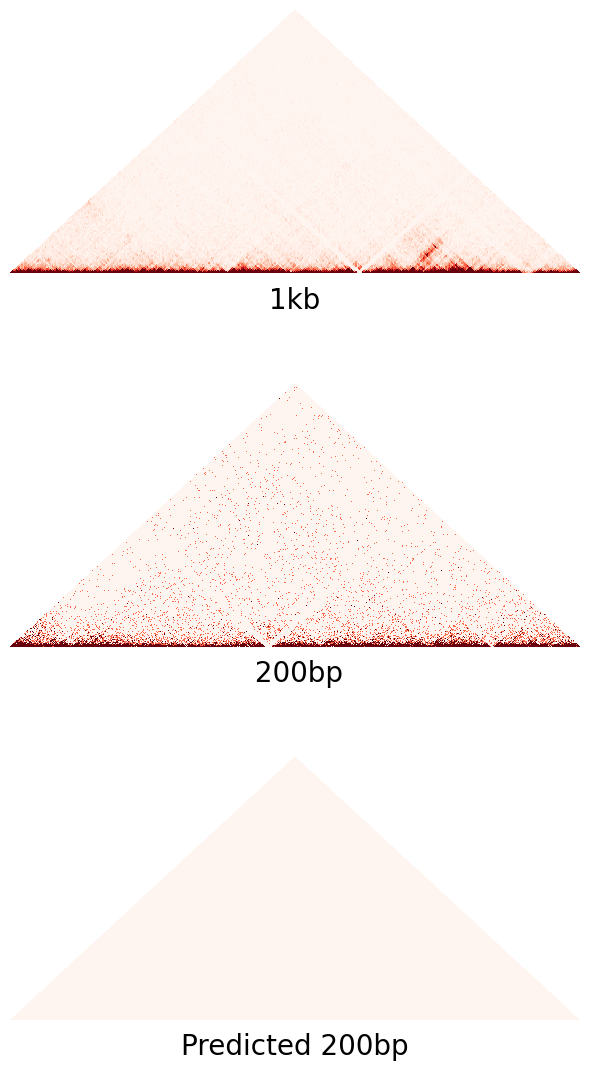

In [6]:
cellline = 'H1-hESC'
# load data
# hic = np.load('/home/dh/work/gChIA/results/250303_10000_NONE_ChIAPETMatrixPredictor_efeaturesq_log1p_true/GM12878/predictions/pred_matrix_chr10_21000000_23000000.npy')
# hic = np.expm1(hic)
# main dioagonal
# hic[np.diag_indices(hic.shape[0])] = 0
# load epi
start = 23000000
end = start + 250000
# real data
prepath = '/home/dh/work/gChIA/results/250509_H1-hESC_200_NONE_ChIAPETMatrixPredictor_efeaturesq_super_micro-C_200bp_log1p_true_hictype_hic_chiatype_hic_hicres_1000/H1-hESC/predictions'
datapath = f'/home/dh/work/gChIA/data/{cellline}/bigWig_files'
pre = np.load(f'{prepath}/pred_matrix_chr10_{start}_{start+250000}.npy')
pre = np.expm1(pre)
print(pre)
bwlist = ['ctcf']
bw = []
for i in bwlist:
    print(f'{datapath}/{cellline}_{i}.bw')
    bw.append(pyBigWig.open(f'{datapath}/{cellline}_{i}.bw'))
epi_list = []
for i in range(len(bwlist)):
    bwf = bw[i].stats('chr10', start, end, type='mean', nBins=pre.shape[0])
    bwn = np.array(bwf)
    bw[i].close()
    epi_list.append(bwf)

# Close the BigWig file

realpath = '/home/dh/work/gChIA/data/H1-hESC/micro-C/4DNFI2TK7L2F.hic'
rpet = _read_hic_matrix(realpath, 'chr10', start, end, 1000,log1p=False)
realpath200 = '/home/dh/work/gChIA/data/H1-hESC/micro-C_200bp/200bp.hic'
start = 127675000
end = start + 250000
rpet200 = _read_hic_matrix(realpath200, 'chr2', start, end, 200,log1p=False)
# print(rpet200)
count = np.count_nonzero(rpet200)
# 计算非0值百分比
total = rpet200.size
percentage = count / total * 100
count2 = np.max(rpet200)
print(f"Percentage of non-zero values: {percentage:.2f}%")
print(count2)
print(count)
visualize_multiple_HiC_with_epigenetics([rpet,rpet200,pre],hic_labels=['1kb',' 200bp','Predicted 200bp'],x_ticks=[f'{start/1000000}MB','chr10',f'{end/1000000}MB'],colorbar=False,interval_between_hic=0,      
    interval_after_hic_block=0.05, 
    interval_between_epi=0.05,
    maxperc=98,
    cmap='Reds',
    fig_width=6,
)
